In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from utils import load_data, load_test_data
from utils import num_classes, epochs, batch_size

In [3]:
X_train, y_train, X_valid, y_valid = load_data(test_size=0.1, img_size=224)

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2686, 224, 224, 1)
(2686, 15)
(299, 224, 224, 1)
(299, 15)


In [5]:
# a classic CNN model
model_name = 'classic_CNN'
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))

model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation(activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 112, 112, 128)     0

In [6]:
# Data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0)

optimizer = keras.optimizers.Adam(lr=10e-6)

model_path = './saved_models/{}.h5'.format(model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])
# Fit the model on the batches generated by datagen.flow().
batch_size = 16
aug_ratio = 1
epochs = 200
steps_per_epoch = int(aug_ratio * X_train.shape[0] / batch_size)
validation_steps = int(aug_ratio * X_valid.shape[0] / batch_size)
model_history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size),
                                    epochs = epochs,
                                    validation_data = (X_valid, y_valid),
                                    callbacks = [checkpoint, earlystop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 167 steps, validate on 299 samples
Epoch 1/200
166/167 [============================>.] - ETA: 0s - loss: 2.6036 - accuracy: 0.1583
Epoch 00001: val_loss improved from inf to 3.22808, saving model to ./saved_models/classic_CNN.h5
167/167 [==============================] - 26s 157ms/step - loss: 2.6013 - accuracy: 0.1599 - val_loss: 3.2281 - val_accuracy: 0.0833
Epoch 2/200
166/167 [============================>.] - ETA: 0s - loss: 2.2685 - accuracy: 0.2585
Epoch 00002: val_loss did not improve from 3.22808
167/167 [==============================] - 22s 131ms/step - loss: 2.2676 - accuracy: 0.2584 - val_loss: 3.4306 - val_accuracy: 0.0833
Epoch 3/200
166/167 [============================>.] - ETA: 0s - loss: 2.1188 - accuracy: 0.3180
Epoch 00003: val_loss improved from 3.22808 to 2.62893, saving model to ./saved_models/classic_CNN.h5
167/167 [==============================] - 2

167/167 [==============================] - 22s 133ms/step - loss: 1.4156 - accuracy: 0.6116 - val_loss: 1.0700 - val_accuracy: 0.6840
Epoch 26/200
166/167 [============================>.] - ETA: 0s - loss: 1.3966 - accuracy: 0.6221
Epoch 00026: val_loss did not improve from 1.07001
167/167 [==============================] - 22s 131ms/step - loss: 1.3960 - accuracy: 0.6228 - val_loss: 1.1269 - val_accuracy: 0.6493
Epoch 27/200
166/167 [============================>.] - ETA: 0s - loss: 1.4021 - accuracy: 0.6093
Epoch 00027: val_loss did not improve from 1.07001
167/167 [==============================] - 22s 132ms/step - loss: 1.4040 - accuracy: 0.6086 - val_loss: 1.0888 - val_accuracy: 0.6701
Epoch 28/200
166/167 [============================>.] - ETA: 0s - loss: 1.3717 - accuracy: 0.6285
Epoch 00028: val_loss did not improve from 1.07001
167/167 [==============================] - 22s 131ms/step - loss: 1.3720 - accuracy: 0.6288 - val_loss: 1.1587 - val_accuracy: 0.6354
Epoch 29/200
166/

166/167 [============================>.] - ETA: 0s - loss: 1.1610 - accuracy: 0.7253
Epoch 00053: val_loss did not improve from 0.90800
167/167 [==============================] - 22s 131ms/step - loss: 1.1626 - accuracy: 0.7243 - val_loss: 0.9535 - val_accuracy: 0.7326
Epoch 54/200
166/167 [============================>.] - ETA: 0s - loss: 1.1769 - accuracy: 0.7185
Epoch 00054: val_loss improved from 0.90800 to 0.90224, saving model to ./saved_models/classic_CNN.h5
167/167 [==============================] - 22s 133ms/step - loss: 1.1763 - accuracy: 0.7187 - val_loss: 0.9022 - val_accuracy: 0.7465
Epoch 55/200
166/167 [============================>.] - ETA: 0s - loss: 1.1589 - accuracy: 0.7272
Epoch 00055: val_loss improved from 0.90224 to 0.89065, saving model to ./saved_models/classic_CNN.h5
167/167 [==============================] - 22s 133ms/step - loss: 1.1581 - accuracy: 0.7281 - val_loss: 0.8906 - val_accuracy: 0.7396
Epoch 56/200
166/167 [============================>.] - ETA: 0

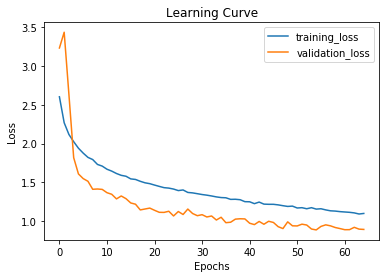

In [7]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

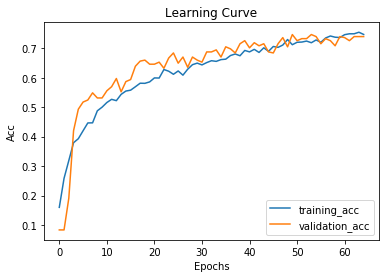

In [9]:
training_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(training_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [11]:
X_test, X_id = load_test_data()

model_path = './saved_models/{}.h5'.format(model_name)
model = load_model(model_path)

scores = model.evaluate(X_valid, y_valid, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])

y_test_pred = model.predict_classes(X_test)
y_test_pred_df = pd.DataFrame({'id': np.array(X_id), 'class':y_test_pred}).sort_values(by='id')
y_test_pred_df.to_csv('./submissions/{}.csv'.format(model_name), index=False)

299/299 [==============================] - 1s 3ms/sample - loss: 0.9235 - accuracy: 0.7458
Validation loss: 0.9234812484935774
Validation accuracy: 0.7458194


In [12]:
# a classic CNN model
model_name = 'classic_CNN_GlobalAveragePooling2D'
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(GlobalAveragePooling2D())

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))

model.add(Dense(num_classes))
model.add(BatchNormalization())
model.add(Activation(activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_7 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_8 (Batch (None, 112, 112, 128)     512       
_________________________________________________________________
activation_8 (Activation)    (None, 112, 112, 128)    

In [13]:
# Data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant',
    cval=0)

optimizer = keras.optimizers.Adam(lr=10e-6)

model_path = './saved_models/{}.h5'.format(model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer, metrics=['accuracy'])
# Fit the model on the batches generated by datagen.flow().
batch_size = 16
aug_ratio = 1
epochs = 200
steps_per_epoch = int(aug_ratio * X_train.shape[0] / batch_size)
validation_steps = int(aug_ratio * X_valid.shape[0] / batch_size)
model_history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size),
                                    epochs = epochs,
                                    validation_data = (X_valid, y_valid),
                                    callbacks = [checkpoint, earlystop],
                                    steps_per_epoch=steps_per_epoch,
                                    validation_steps=validation_steps)

  ...
    to  
  ['...']
Train for 167 steps, validate on 299 samples
Epoch 1/200
166/167 [============================>.] - ETA: 0s - loss: 2.3980 - accuracy: 0.2291
Epoch 00001: val_loss improved from inf to 2.87051, saving model to ./saved_models/classic_CNN_GlobalAveragePooling2D.h5
167/167 [==============================] - 22s 134ms/step - loss: 2.3950 - accuracy: 0.2296 - val_loss: 2.8705 - val_accuracy: 0.0764
Epoch 2/200
166/167 [============================>.] - ETA: 0s - loss: 1.9077 - accuracy: 0.4148
Epoch 00002: val_loss improved from 2.87051 to 2.86594, saving model to ./saved_models/classic_CNN_GlobalAveragePooling2D.h5
167/167 [==============================] - 21s 126ms/step - loss: 1.9051 - accuracy: 0.4165 - val_loss: 2.8659 - val_accuracy: 0.0764
Epoch 3/200
166/167 [============================>.] - ETA: 0s - loss: 1.7788 - accuracy: 0.4774
Epoch 00003: val_loss improved from 2.86594 to 2.19399, saving model to ./saved_models/classic_CNN_GlobalAveragePooling2D.h5


Epoch 27/200
166/167 [============================>.] - ETA: 0s - loss: 1.1984 - accuracy: 0.7291
Epoch 00027: val_loss did not improve from 1.03751
167/167 [==============================] - 21s 125ms/step - loss: 1.1992 - accuracy: 0.7277 - val_loss: 1.0942 - val_accuracy: 0.6424
Epoch 28/200
166/167 [============================>.] - ETA: 0s - loss: 1.1885 - accuracy: 0.7257
Epoch 00028: val_loss improved from 1.03751 to 1.02243, saving model to ./saved_models/classic_CNN_GlobalAveragePooling2D.h5
167/167 [==============================] - 21s 126ms/step - loss: 1.1877 - accuracy: 0.7258 - val_loss: 1.0224 - val_accuracy: 0.6875
Epoch 29/200
166/167 [============================>.] - ETA: 0s - loss: 1.1858 - accuracy: 0.7340
Epoch 00029: val_loss did not improve from 1.02243
167/167 [==============================] - 21s 124ms/step - loss: 1.1848 - accuracy: 0.7348 - val_loss: 1.1134 - val_accuracy: 0.6701
Epoch 30/200
166/167 [============================>.] - ETA: 0s - loss: 1.176

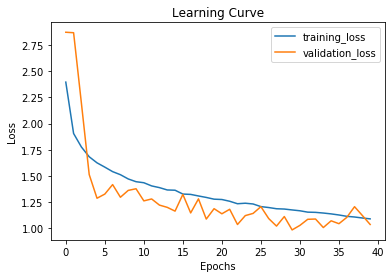

In [14]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

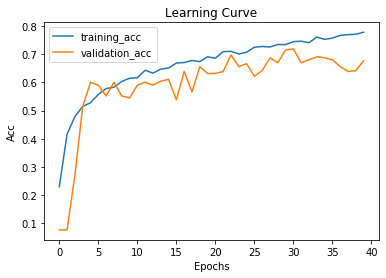

In [15]:
training_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

plt.plot(training_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [16]:
X_test, X_id = load_test_data()

model_path = './saved_models/{}.h5'.format(model_name)
model = load_model(model_path)

scores = model.evaluate(X_valid, y_valid, verbose=1)
print('Validation loss:', scores[0])
print('Validation accuracy:', scores[1])

y_test_pred = model.predict_classes(X_test)
y_test_pred_df = pd.DataFrame({'id': np.array(X_id), 'class':y_test_pred}).sort_values(by='id')
y_test_pred_df.to_csv('./submissions/{}.csv'.format(model_name), index=False)

299/299 [==============================] - 1s 3ms/sample - loss: 1.0334 - accuracy: 0.7090
Validation loss: 1.033407340081639
Validation accuracy: 0.7090301
